In [ ]:
import cv2
import numpy as np
# For Google Colab we use the cv2_imshow() function
from google.colab.patches import cv2_imshow

In [ ]:
image=cv2.imread("3.jpg",cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

AttributeError: ignored

In [ ]:
image2=cv2.imread("4.png",cv2.IMREAD_GRAYSCALE)
cv2_imshow(image2)

In [ ]:
print(image2.shape)

(636, 482)


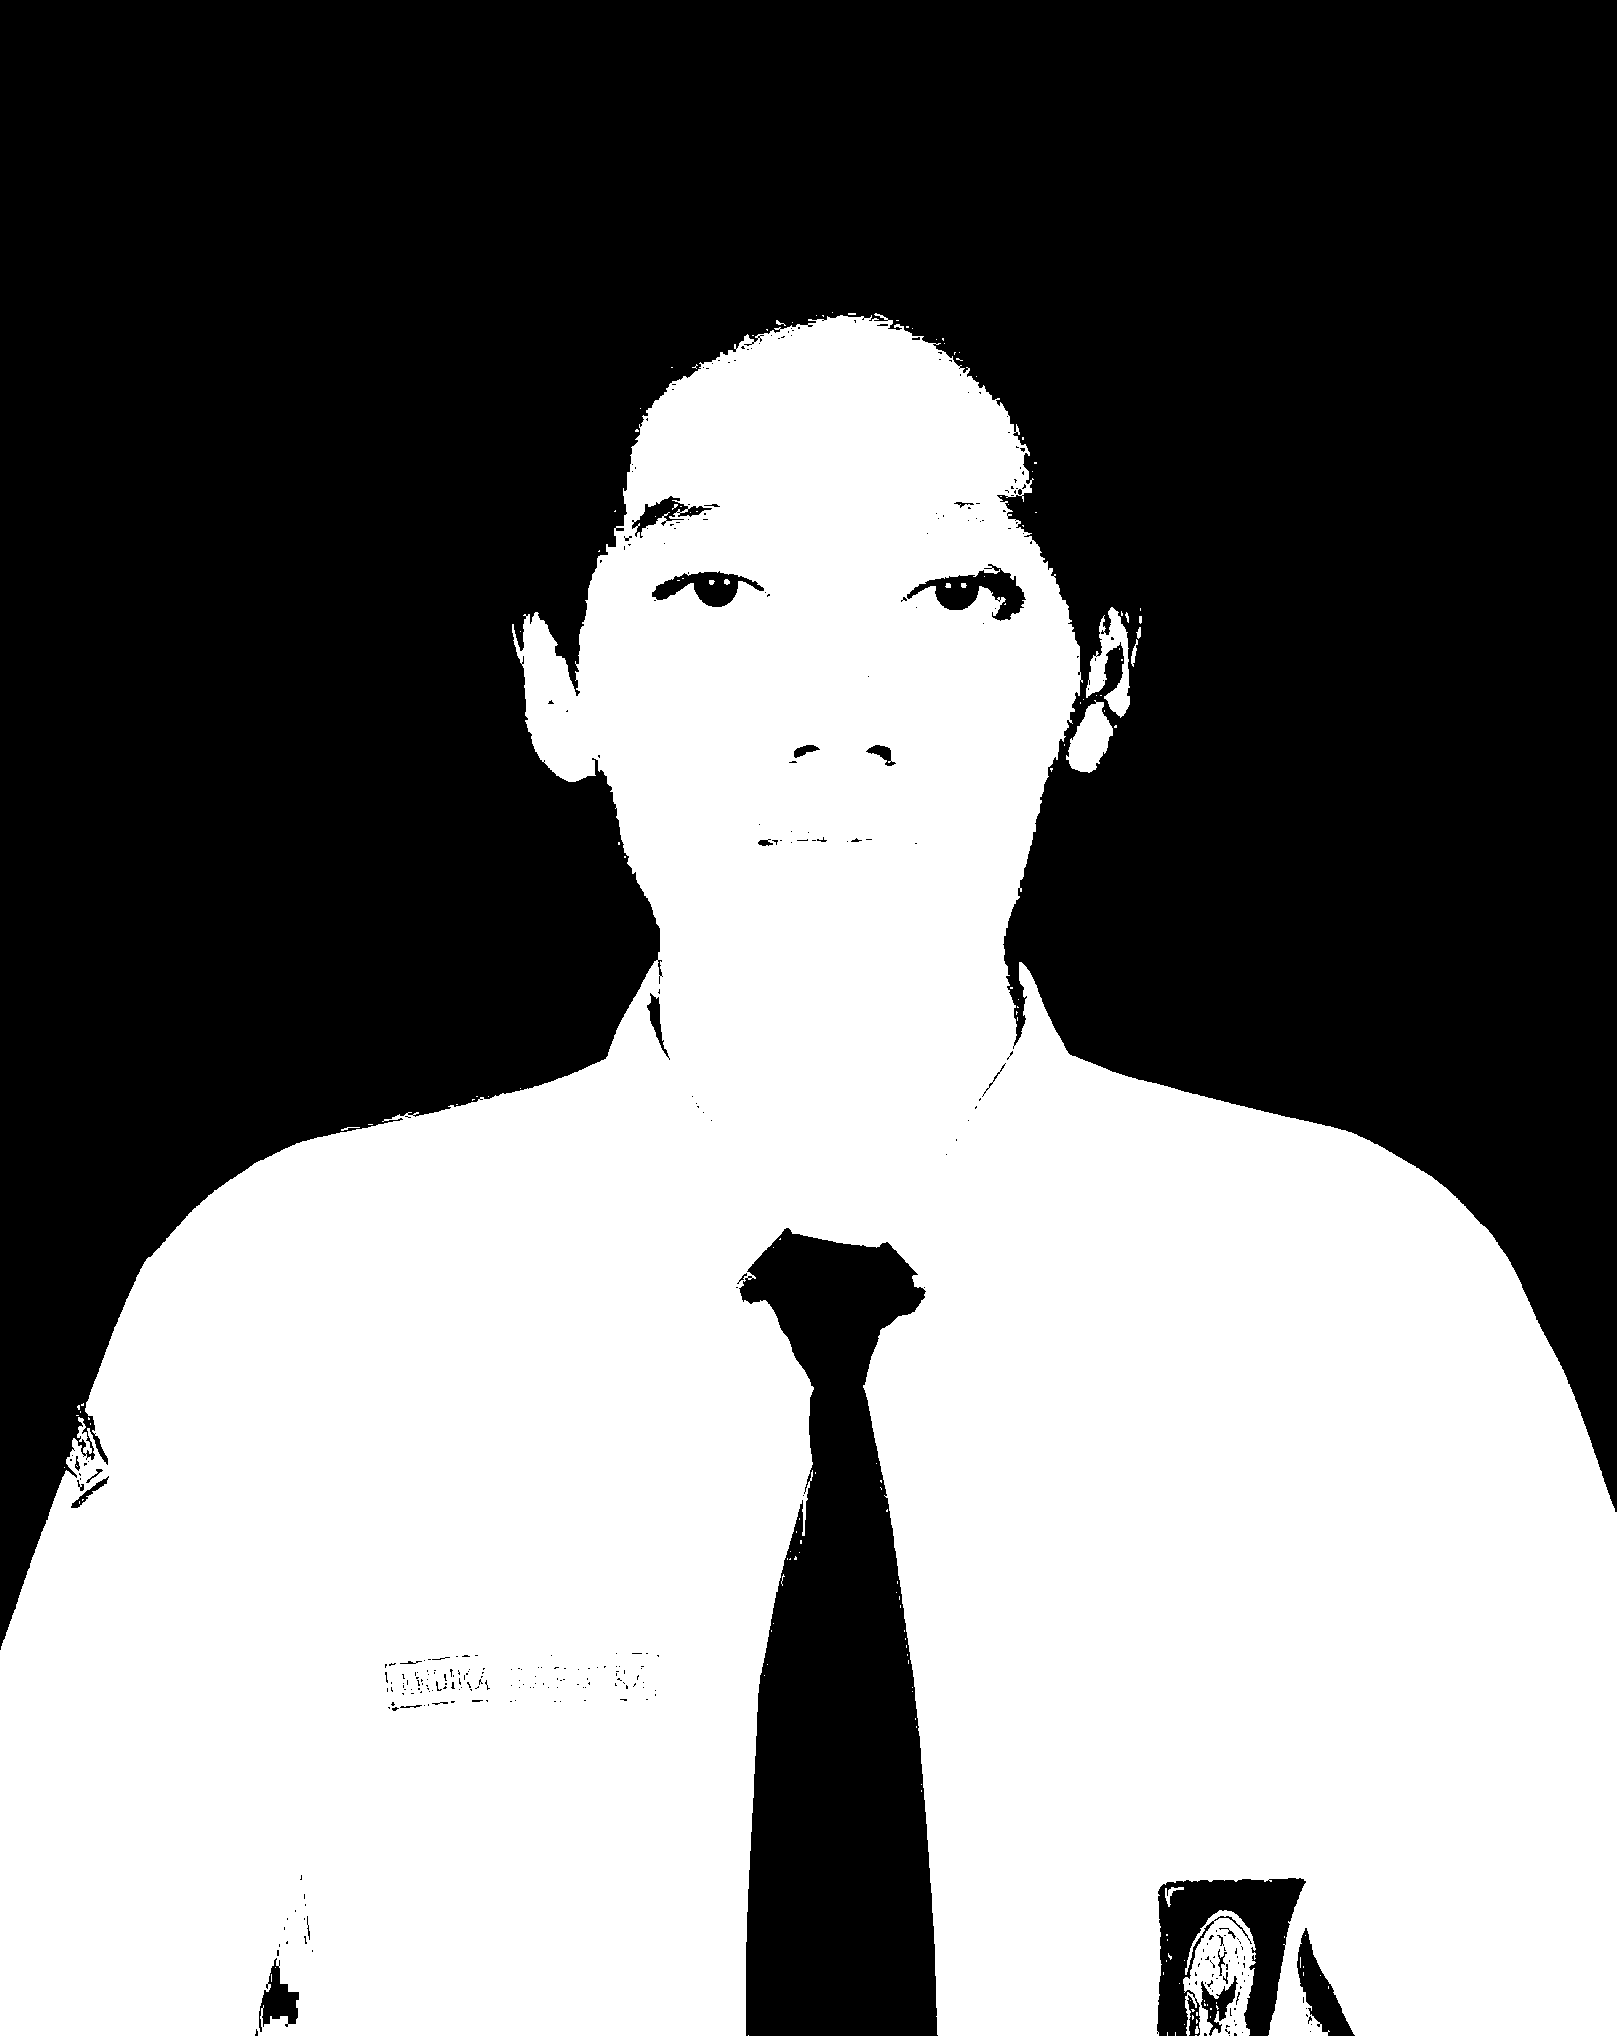

In [ ]:
ret, thresh = cv2.threshold(image, 125, 255, cv2.THRESH_BINARY)

cv2_imshow(thresh)

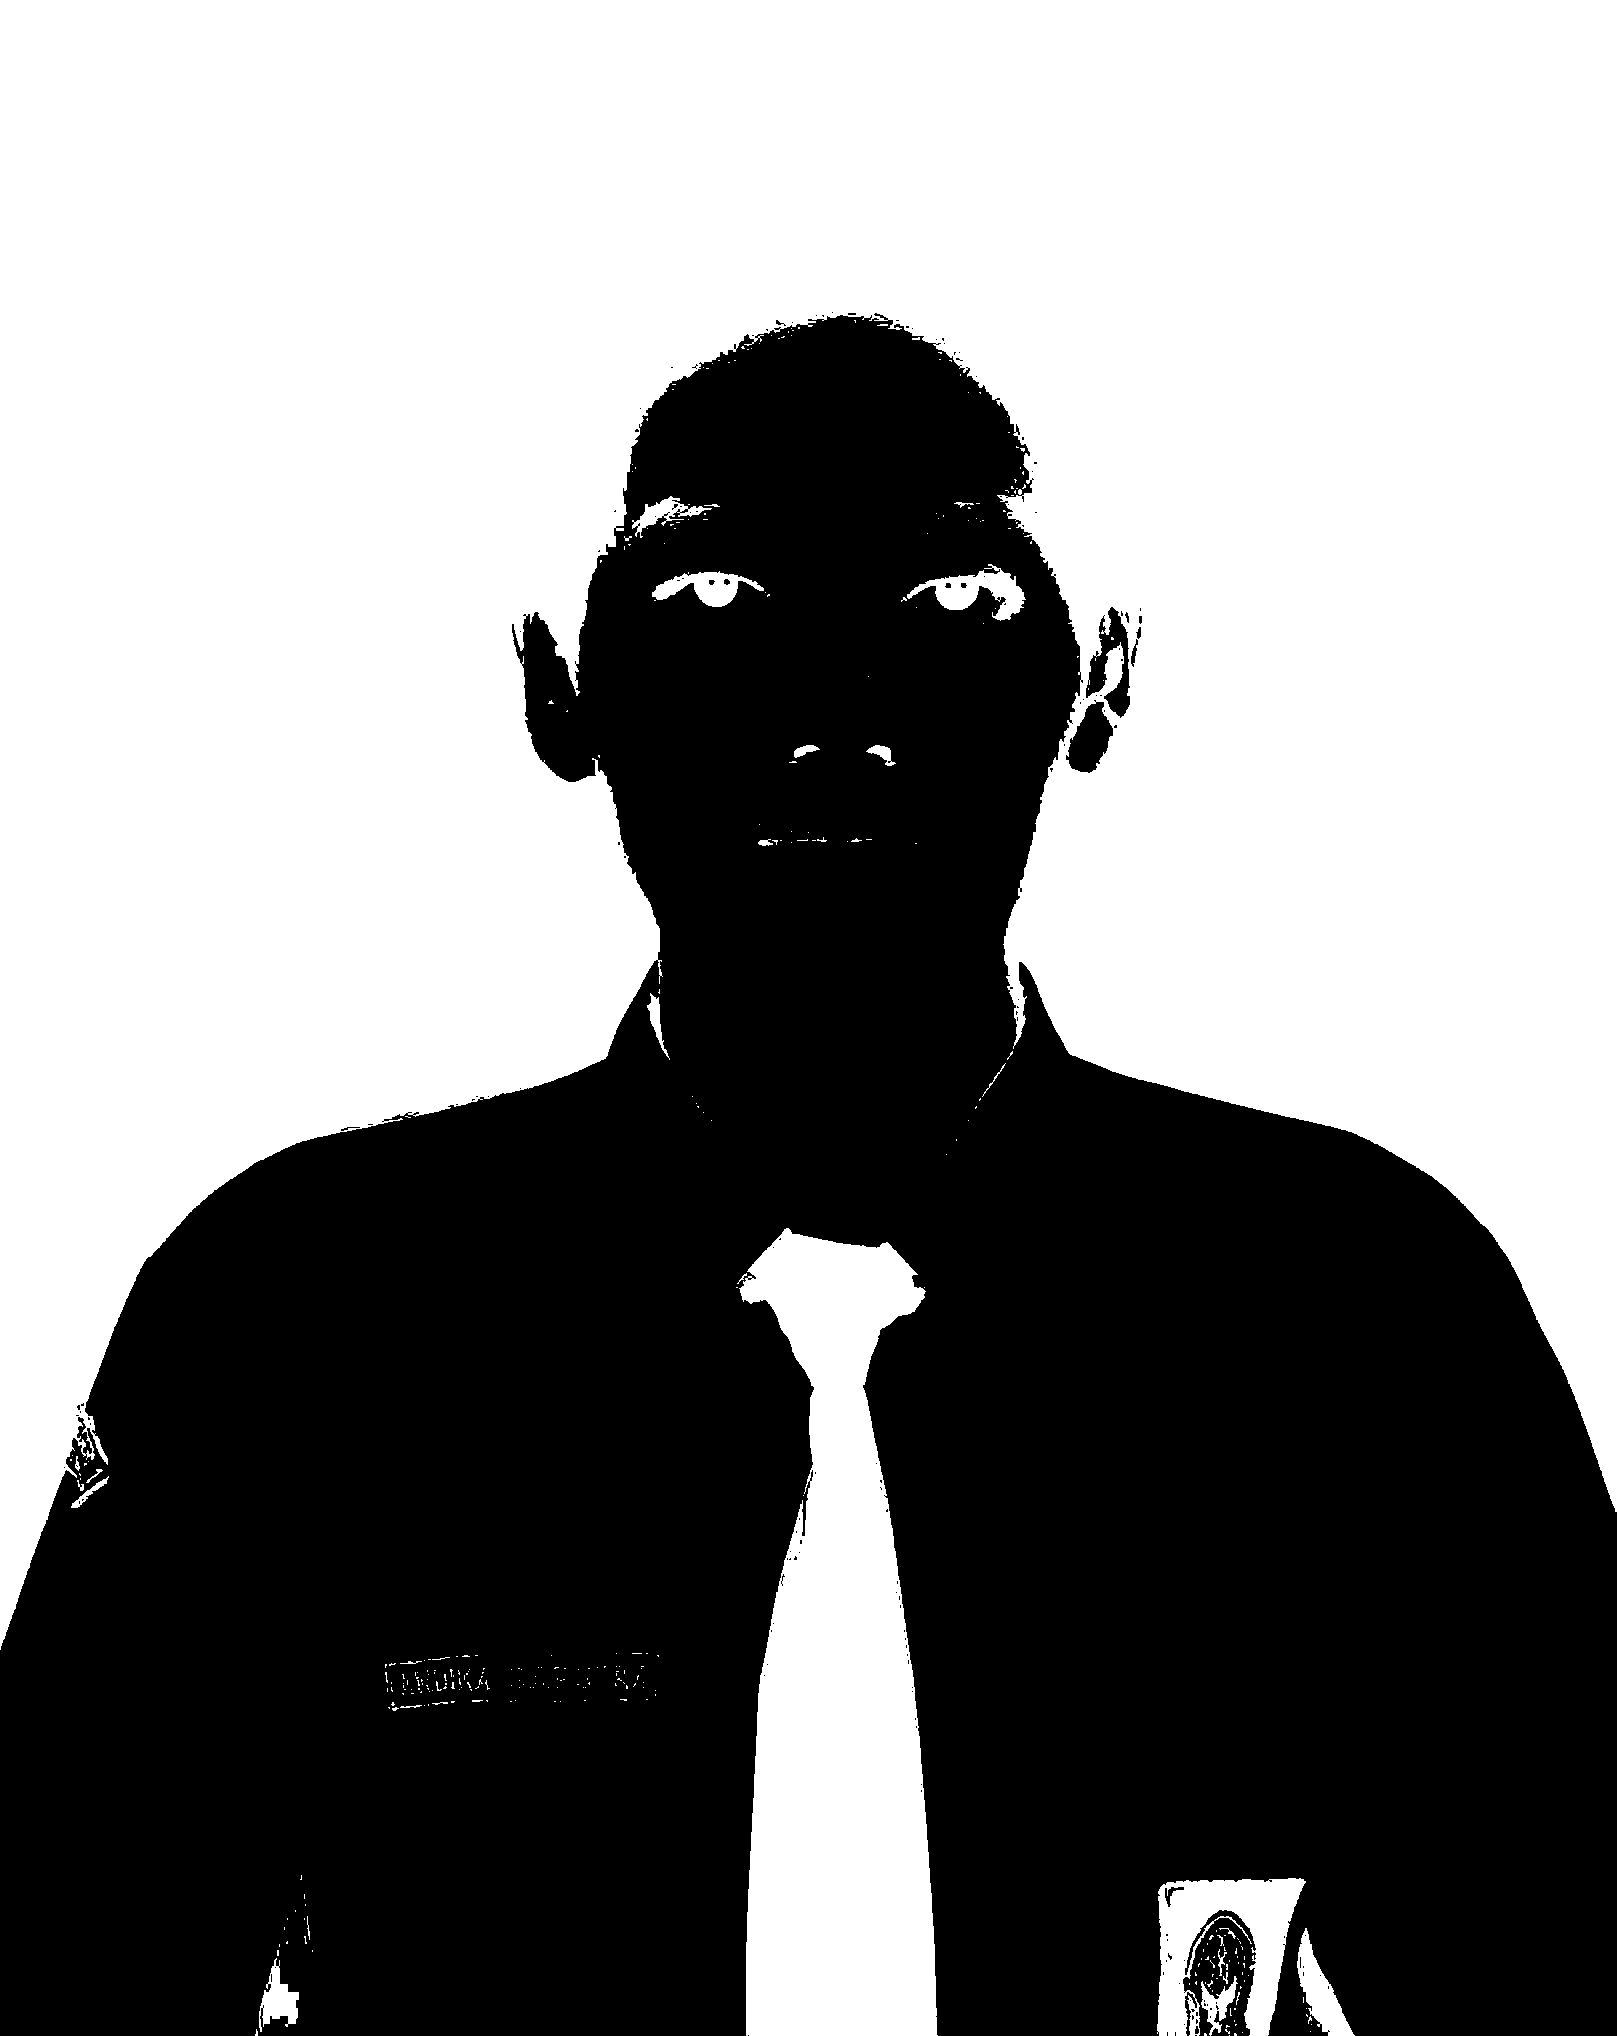

In [ ]:
bitwiseNot = cv2.bitwise_not(thresh)
cv2_imshow(bitwiseNot)

In [ ]:
#baris, kolom
y, x = image.shape
n, m = image2.shape
print(n, m)

636 482


In [ ]:
negative = np.zeros( (y,x), dtype="uint8" )
bright = np.zeros( (y,x), dtype="uint8" )
trans = np.zeros( (y,x), dtype="uint8" )
rotate = np.zeros( (x,y), dtype="uint8" )
rotateCW = np.zeros( (x,y), dtype="uint8" )
rotate180 = np.zeros( (y, x), dtype="uint8" )
flip_vertical = np.zeros( (y, x), dtype="uint8" )
zooming = np.zeros( (2*y, 2*x), dtype="uint8" )
arithmetic = np.zeros( (n, m), dtype="uint8" )

In [ ]:
def negativeImage(image, negative, x, y):
  for i in range(y):
    for j in range(x):
      negative[i,j] = 255 - image[i,j]
  negative=negative.astype("uint8")

  return negative

In [ ]:
def brighteningImage(image, bright, x, y):
  for i in range(y):
    for j in range(x):
      temp = image[i,j] + 100
      if (temp<0):
        bright[i,j] = 0
      elif (temp>255):
        bright[i,j] = 255
      else:
        bright[i,j] = temp
  bright=bright.astype("uint8")

  return bright

In [ ]:
def translation(image, trans, x, y, m, n):
  for i in range(y):
    for j in range(x):
      if (i+m>=y or j+n>=x or i+m<0 or j+n<0):
        trans[i,j]=0
      else:
        trans[i,j]=image[i+m,j+n]
  trans=trans.astype("uint8")

  return trans

In [ ]:
def rotation(image, rotate, x, y):
  for i in range(y):
    k = x-1
    for j in range(x):
      rotate[k,i]=image[i,j]
      k-=1
  rotate=rotate.astype("uint8")

  return rotate

In [ ]:
def rotationCW(image, rotateCW, x, y):
  k = y
  for i in range(y):
    k-=1
    for j in range(x):
      rotateCW[j,k]=image[i,j]
  rotateCW=rotateCW.astype("uint8")

  return rotateCW

In [ ]:
def rotation180(image, rotate180, x, y):
  k = y
  for i in range(y):
    k-=1
    l = x
    for j in range(x):
      l-=1
      rotate180[k,l]=image[i,j]
      
  rotate180=rotate180.astype("uint8")

  return rotate180

In [ ]:
def vertical_flip(image, flip_vertical, x, y):
  k = y-1
  for i in range(y):
    for j in range(x):
      flip_vertical[k,j]=image[i,j]
    k-=1

  flip_vertical=flip_vertical.astype("uint8")

  return flip_vertical

In [ ]:
def zoom_out(image, zooming, x, y):
  m=0
  n=0
  for i in range(y):
    for j in range(x):
      zooming[m,n]=image[i,j]
      zooming[m,n+1]=image[i,j]
      zooming[m+1,n]=image[i,j]
      zooming[m+1,n+1]=image[i,j]
      n=n+2
    m=m+2
    n=0

  zooming=zooming.astype("uint8")

  return zooming

In [ ]:
def arithmeticOperation(image1, image2, resultImage, x, y):
  for i in range(y):
    for j in range(x):
      temp = image1[i,j] + image2[i,j]
      if (temp>255):
        resultImage[i,j] = 255
      else:
        resultImage[i,j] = temp
  resultImage=resultImage.astype("uint8")

  return resultImage

In [ ]:
print(thresh[0,0])
print(notBoleanImage[0,0])

0
0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in ubyte_scalars
  after removing the cwd from sys.path.


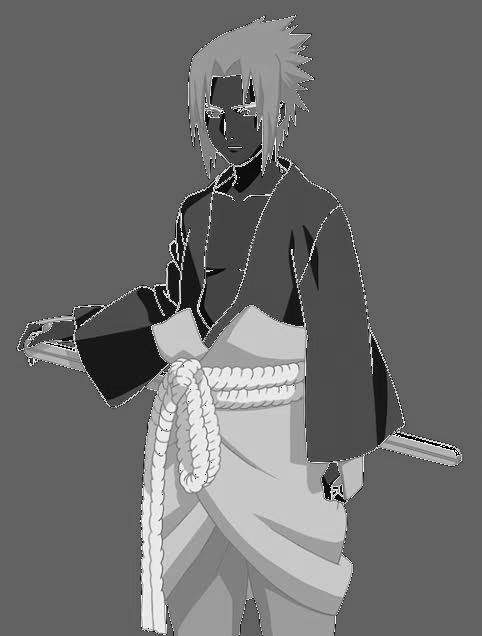

In [ ]:
if __name__ == "__main__":
  #negative_image = negativeImage(image,negative,x,y)
  #cv2_imshow(negative_image)
  bright_image = brighteningImage(image, bright, x, y)
  cv2_imshow(bright_image)
  #translation_image = translation(image, trans, x, y, 100, 10)
  #cv2_imshow(translation_image)
  #rotation_image = rotation(image, rotate, x, y)
  #cv2_imshow(rotation_image)
  #rotationCW_image = rotationCW(image, rotateCW, x, y)
  #cv2_imshow(rotationCW_image)
  #rotation180_image = rotation180(image, rotate180, x, y)
  #cv2_imshow(rotation180_image)
  #flip_vertical_image = vertical_flip(image, flip_vertical, x, y)
  #cv2_imshow(flip_vertical_image)
  #zooming_image = zoom_out(image, zooming, x, y)
  #cv2_imshow(zooming_image)
  #notBoleanImage = notBolean(image, boolean, x, y)
  #cv2_imshow(notBoleanImage)
  # arithmeticImage = arithmeticOperation(image, image2, arithmetic, m, n)
  # cv2_imshow(arithmeticImage)

In [ ]:
print(zooming_image.shape)

(4072, 3234)
